In [1]:
import numpy as np
import pandas as pd

In [2]:
cares = pd.read_csv("../data/CARES_encoded.csv")
cares

,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,AnaestypeCategory,...,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,RDW15.7,ASAcategorybinned,ICUAdmgt24h,Chinese,Indian,Malay
0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,NaN,0.0,0,1,0,0
1,0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,0.0,0.0,0,1,0,0
2,0,NaN,1.0,152.538570,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,0.0,0.0,0.0,0,1,0,0
3,1,NaN,2.0,117.231496,NaN,0.0,1.0,0.0,1.0,0,...,0,0,0,0.0,0.0,0.0,0,1,0,0
4,1,0.0,1.0,98.651255,59.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0.0,1.0,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90780,0,2.0,1.0,48.339582,NaN,0.0,0.0,0.0,0.0,0,...,0,1,0,2.0,0.0,1.0,0,0,0,0
90781,1,1.0,2.0,126.592489,NaN,0.0,0.0,0.0,0.0,0,...,0,1,0,0.0,0.0,NaN,0,0,0,0
90782,0,NaN,0.0,86.306771,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,1.0,0.0,NaN,0,0,0,0
90783,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,NaN,1.0,0,1,0,0


Following what the papers say as "statistically significant"

In [3]:
cares.columns

Index(['GENDER', 'RCRI score', 'Anemia category', 'PreopEGFRMDRD',
       'DaysbetweenDeathandoperation', 'Preoptransfusionwithin30days',
       'Intraop', 'Postopwithin30days', 'Transfusionintraandpostop',
       'AnaestypeCategory', 'PriorityCategory',
       'TransfusionIntraandpostopCategory', 'AGEcategory', 'Mortality',
       'thirtydaymortality', 'SurgRiskCategory', 'CVARCRICategory',
       'IHDRCRICategory', 'CHFRCRICategory', 'DMinsulinRCRICategory',
       'CreatinineRCRICategory', 'GradeofKidneyCategory', 'RDW15.7',
       'ASAcategorybinned', 'ICUAdmgt24h', 'Chinese', 'Indian', 'Malay'],
      dtype='object')

In [12]:
# to predict mortality, these columns are considered important
mortality_significant_columns = [
    'AGEcategory',
    'SurgRiskCategory',
    'Chinese',
    'Indian',
    'Malay',
    'Anemia category',
    'GradeofKidneyCategory',
    'RDW15.7',
    'CVARCRICategory',
    'IHDRCRICategory',
    'CHFRCRICategory',
    'DMinsulinRCRICategory',
    'ASAcategorybinned',
    'GENDER'
]

mortality_cares = cares[mortality_significant_columns + ['Mortality']]

In [31]:
mortality_cares = mortality_cares.dropna(how='any')

In [32]:
mortality_cares.shape

(76064, 15)

In [33]:
mortality_cares["Mortality"].isna().value_counts()

Mortality
False    76064
Name: count, dtype: int64

In [34]:
mortality_cares["Mortality"].value_counts()

Mortality
0    71083
1     4981
Name: count, dtype: int64

In [38]:
icu_significant_columns = [
    'AGEcategory',
    'SurgRiskCategory',
    'Chinese',
    'Indian',
    'Malay',
    'Anemia category',
    'RDW15.7',
    'CVARCRICategory',
    'IHDRCRICategory',
    'CHFRCRICategory',
    'GradeofKidneyCategory',
    'DMinsulinRCRICategory',
    'ASAcategorybinned',
    'PriorityCategory',
    'GENDER'
]

icu_cares = cares[icu_significant_columns + ["ICUAdmgt24h"]]

In [39]:
icu_cares = icu_cares.dropna(how='any')

In [40]:
icu_cares["ICUAdmgt24h"].value_counts()

ICUAdmgt24h
0    75008
1     1056
Name: count, dtype: int64

# Simple Modeling

In [42]:
RANDOM_SEED = 623

In [43]:
np.random.seed(RANDOM_SEED)

In [41]:
from sklearn.model_selection import train_test_split

In [44]:
X = mortality_cares.drop('Mortality', axis=1)
y = mortality_cares['Mortality']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

Oversampling

In [46]:
from imblearn.over_sampling import SMOTE

In [48]:
smote = SMOTE()

x_res, y_res = smote.fit_resample(x_train, y_train)

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [89]:
logreg_mort = LogisticRegression(random_state=RANDOM_SEED)
rf_mort = RandomForestClassifier(random_state=RANDOM_SEED)

In [59]:
logreg_mort.fit(x_res, y_res)

LogisticRegression(random_state=623)

In [90]:
rf_mort.fit(x_res, y_res)

RandomForestClassifier(random_state=623)

In [91]:
# y_pred = logreg_mort.predict(x_test)
# y_pred_proba = logreg_mort.predict_proba(x_test)

y_pred = rf_mort.predict(x_test)
y_pred_proba = rf_mort.predict_proba(x_test)

In [92]:
from sklearn.metrics import f1_score, roc_curve, auc, classification_report

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     21326
           1       0.20      0.50      0.29      1494

    accuracy                           0.84     22820
   macro avg       0.58      0.68      0.60     22820
weighted avg       0.91      0.84      0.87     22820



In [94]:
f1_score(y_test, y_pred)

0.2864741641337386

In [95]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

In [96]:
auc(fpr, tpr)

0.7448968401663172

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

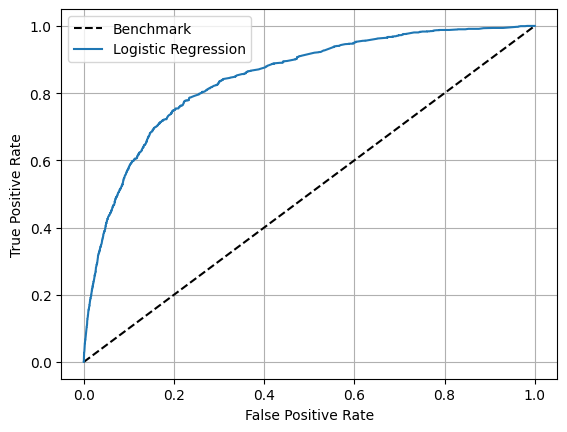

In [79]:
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")
plt.plot(fpr, tpr, label='Logistic Regression')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

In [98]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

In [99]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(32, ))